In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, curve_fit
import astropy.units as u
import astropy.constants as const
import math
import statistics
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)

\begin{equation}
    \lambda_{n} \nu_{n} = v_{n} \hspace{2mm}\rightarrow\hspace{2mm} \nu_{n} = \frac{v_{n}}{\lambda_{n}}
\end{equation}

Para tubo cerrado:

\begin{equation}
    \lambda_{n} = \frac{2L}{n} \hspace{2mm}\rightarrow\hspace{2mm} n = \frac{2L}{\lambda_{n}} \tag{2}
\end{equation}

siendo $n$ el modo de vibración.

Para tubo con una salida abierta,

\begin{equation}
    \lambda_{n} = \frac{4L}{2n-1} \hspace{2mm}\rightarrow\hspace{2mm} n = \frac{2L}{\lambda_{n}} + \frac{1}{2} \tag{3}
\end{equation}

In [2]:
largo_tubo = 100 # cm
error_medicion = 0.05 # cm
err_freq = 0.0005 # kHz

In [3]:
# EXPERIMENTO 1, PISTÓN FIJO

data_exp_1 = pd.DataFrame([])

freq_data_1 = np.array([0.396, 0.512, 0.755, 0.978, 1.253]) # kHz
wavelen_data_1 = np.array([49.5 - 12, 51.1 - 29.5, 29.5 - 19.2, 28.8 - 16.5, 30.2 - 23.8]) * 4 # cm
modos_exp_1 = np.array([round((2 * largo_tubo) / wavelen, 0) for wavelen in wavelen_data_1])  # según ecuación 2

data_exp_1['f (kHz)'] = freq_data_1
data_exp_1['lambda (cm)'] = wavelen_data_1
data_exp_1['n'] = modos_exp_1
data_exp_1['err_freq'] = [err_freq for i in range(len(freq_data_1))]
data_exp_1['err_lambda'] = [error_medicion for i in range(len(wavelen_data_1))]
data_exp_1

,f (kHz),lambda (cm),n,err_freq,err_lambda
0,0.396,150.0,1.0,0.0005,0.05
1,0.512,86.4,2.0,0.0005,0.05
2,0.755,41.2,5.0,0.0005,0.05
3,0.978,49.2,4.0,0.0005,0.05
4,1.253,25.6,8.0,0.0005,0.05


Text(3.806250000000001, 1303.0, 'n = 8')

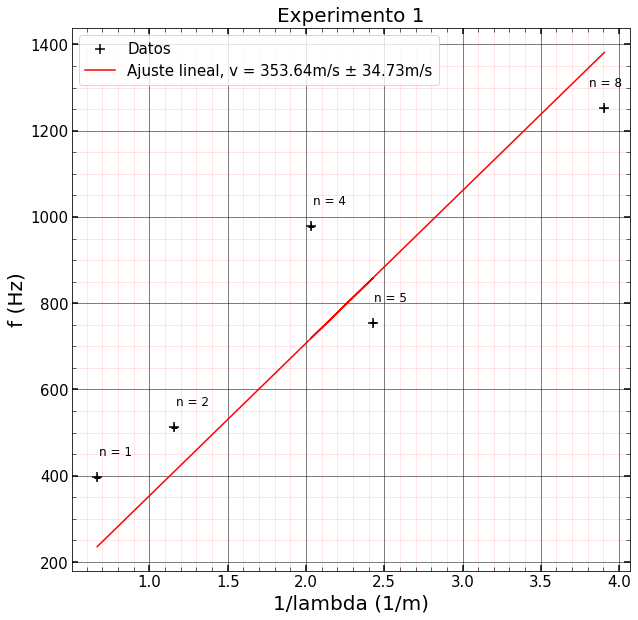

In [4]:
# GRAFICO EXPERIMENTO 1
# GRAFICA LA FRECUENCIA (EN HZ) EN FUNCIÓN DEL INVERSO DE LA LONGITUD DE ONDA (EN METROS)

# Se define la función lineal
def f(x, v):
    return v * x

# Se definen los datos a graficar
x = 1 / (data_exp_1['lambda (cm)'] / 100) # 1/m
y = data_exp_1['f (kHz)'] * 1000 # Hz

# Se realiza el ajuste lineal
popt, pcov = curve_fit(f, x, y, p0=[343])

# Se grafican los datos y el ajuste
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, marker='+', c='black', s=100, label='Datos')
# agrega barras de error
ax.errorbar(x, y, xerr=data_exp_1['err_lambda'] / 100, yerr=data_exp_1['err_freq'] * 1000, fmt='none', ecolor='black', capsize=3)

ax.plot(x, f(x, *popt), 'r-', label='Ajuste lineal, v = ' + str(round(popt[0], 2)) + 'm/s ± ' + str(round(np.sqrt(pcov[0][0]), 2)) + 'm/s')
ax.set_xlabel('1/lambda (1/m)', fontsize=20)
ax.set_ylabel('f (Hz)', fontsize=20)
ax.set_title('Experimento 1', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(50))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)

# agrega un pequeño texto al lado del punto de la primera medición

ax.annotate('n = {}'.format(int(data_exp_1['n'][0])), xy=(x[0], y[0]), xytext=(x[0] + 0.01, y[0] + 50), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_1['n'][1])), xy=(x[1], y[1]), xytext=(x[1] + 0.01, y[1] + 50), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_1['n'][2])), xy=(x[2], y[2]), xytext=(x[2] + 0.01, y[2] + 50), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_1['n'][3])), xy=(x[3], y[3]), xytext=(x[3] + 0.01, y[3] + 50), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_1['n'][4])), xy=(x[4], y[4]), xytext=(x[4] - 0.1, y[4] + 50), fontsize=12)


In [6]:
# EXPERIMENTO 2, FRECUENCIA FIJA, 1.480 kHz

nodos_exp_2 = np.array([13, 19.2, 28.4, 40.1, 54, 65.3, 77.2, 89.5]) # cm
freq_exp_2 = 1.480 # kHz

    # promedio de la distancia entre nodos

mean_dist_exp_2 = np.mean(np.array([nodos_exp_2[i+1] - nodos_exp_2[i] for i in range(len(nodos_exp_2) - 1)]))
wavelen_exp_2 = mean_dist_exp_2 * 2 # cm
velocidad_fase = ((wavelen_exp_2 * u.cm).to(u.m) * (freq_exp_2 * u.kHz).to(u.s**-1))
err_velocidad_fase = np.sqrt((wavelen_exp_2 * u.cm).to(u.m)**2 * (err_freq * u.kHz).to(u.s**-1)**2 + (freq_exp_2 * u.kHz).to(u.s**-1)**2 * (error_medicion * u.cm).to(u.m)**2)
modo_vibracion_exp_2 = int(round((2 * largo_tubo) / wavelen_exp_2, 0))  # según ecuación 2

print('Longitud de onda: ', round(wavelen_exp_2, 3), ' cm ± ', error_medicion, ' cm')
print('Velocidad de fase: ', round(velocidad_fase.value, 3), ' m/s ± ', round(err_velocidad_fase.value, 3), ' m/s')
print('    Referencia, velocidad del sonido en el aire: 343 m/s')
print('Modo de vibración: ', modo_vibracion_exp_2)

Longitud de onda:  21.857  cm ±  0.05  cm
Velocidad de fase:  323.486  m/s ±  0.748  m/s
    Referencia, velocidad del sonido en el aire: 343 m/s
Modo de vibración:  9


In [96]:
# EXPERIMENTO 3, EXTREMO LIBRE

freq_data_3 = np.array([1.760, 1.976, 1.565]) # kHz

nodos_3_1 = np.array([12, 22.2, 32.2, 41.8, 51.7, 61.5, 71.3, 81.4])
nodos_3_2 = np.array([11.8, 21.8, 29.1, 38.2, 47.2, 55.9, 64.6, 73.2, 82.4])
nodos_3_3 = np.array([11.8, 22.9, 34.9, 46.4, 55.5, 68.5, 79.5])

mean_dist_3_1 = np.mean(np.array([nodos_3_1[i+1] - nodos_3_1[i] for i in range(len(nodos_3_1) - 1)]))
mean_dist_3_2 = np.mean(np.array([nodos_3_2[i+1] - nodos_3_2[i] for i in range(len(nodos_3_2) - 1)]))
mean_dist_3_3 = np.mean(np.array([nodos_3_3[i+1] - nodos_3_3[i] for i in range(len(nodos_3_3) - 1)]))

wavelen_3_1 = mean_dist_3_1 * 2 # cm
wavelen_3_2 = mean_dist_3_2 * 2 # cm
wavelen_3_3 = mean_dist_3_3 * 2 # cm

data_exp_3 = pd.DataFrame([])
data_exp_3['f (kHz)'] = freq_data_3
data_exp_3['lambda (cm)'] = [wavelen_3_1, wavelen_3_2, wavelen_3_3]

modos_exp_3 = np.array([int(round(((2 * largo_tubo) / wavelen) + (1/2), 0)) 
                        for wavelen in data_exp_3['lambda (cm)']])    # Según ecuación 3

data_exp_3['n'] = modos_exp_3
data_exp_3['err_freq'] = [err_freq for i in range(len(freq_data_3))]
data_exp_3['err_lambda'] = [error_medicion for i in range(len(data_exp_3['lambda (cm)']))]
data_exp_3

,f (kHz),lambda (cm),n,err_freq,err_lambda
0,1.760,19.828571,11,0.0005,0.05
1,1.976,17.650000,12,0.0005,0.05
2,1.565,22.566667,9,0.0005,0.05


Text(4.381314623338258, 1575.0, 'n = 9')

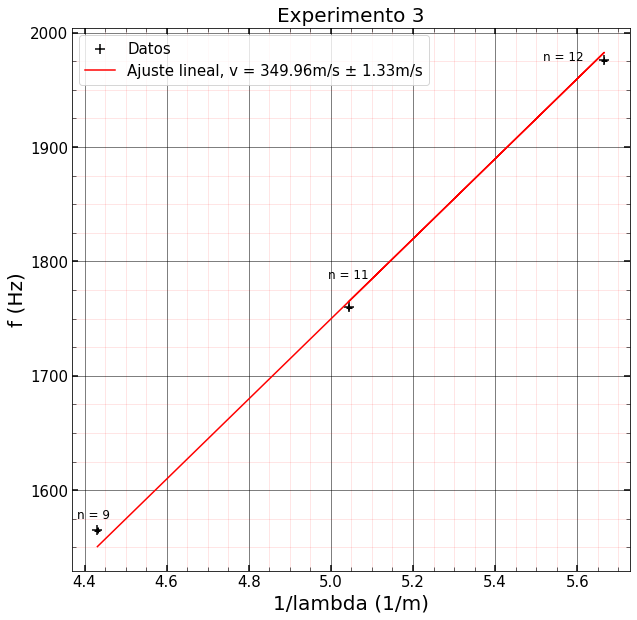

In [112]:
# GRAFICO EXPERIMENTO 3
# GRAFICA LA FRECUENCIA (EN HZ) EN FUNCIÓN DEL INVERSO DE LA LONGITUD DE ONDA (EN METROS)

# Se define la función lineal
def f(x, v):
    return v * x

# Se definen los datos a graficar
x = 1 / (data_exp_3['lambda (cm)'] / 100) # 1/m
y = data_exp_3['f (kHz)'] * 1000 # Hz

# Se realiza el ajuste lineal
popt, pcov = curve_fit(f, x, y, p0=[343])

# Se grafican los datos y el ajuste
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, marker='+', c='black', s=100, label='Datos')
# agrega barras de error
ax.errorbar(x, y, xerr=data_exp_3['err_lambda'] / 100, yerr=data_exp_3['err_freq'] * 1000, fmt='none', ecolor='black', capsize=3)

ax.plot(x, f(x, *popt), 'r-', label='Ajuste lineal, v = ' + str(round(popt[0], 2)) + 'm/s ± ' + str(round(np.sqrt(pcov[0][0]), 2)) + 'm/s')
ax.set_xlabel('1/lambda (1/m)', fontsize=20)
ax.set_ylabel('f (Hz)', fontsize=20)
ax.set_title('Experimento 3', fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(25))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.legend(fontsize=15, markerscale=1)

# agrega un pequeño texto al lado del punto de la primera medición

ax.annotate('n = {}'.format(int(data_exp_3['n'][0])), xy=(x[0], y[0]), xytext=(x[0] -0.05, y[0] + 25), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_3['n'][1])), xy=(x[1], y[1]), xytext=(x[1] -0.15, y[1]), fontsize=12)
ax.annotate('n = {}'.format(int(data_exp_3['n'][2])), xy=(x[2], y[2]), xytext=(x[2] -0.05, y[2] + 10), fontsize=12)
